In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np

In [3]:
sys.path.append('../../../')
sys.path.append('../../')

In [4]:
import SimulationFramework.Modules.read_twiss_file as rtf

In [6]:
import SimulationFramework.Modules.plotting as plotting
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20,8)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [7]:
twiss=rtf.twiss()

In [8]:
twiss

[]

# Using GPT

In [9]:
twiss.read_gdf_twiss_files('example_GPT/Gun_emitt.gdf')

GDF filename =  example_GPT/Gun_emitt.gdf


In [11]:
type(twiss)

SimulationFramework.Modules.read_twiss_file.twiss

In [12]:
isinstance(twiss['z'], np.ndarray)

True

In [13]:
twiss

['z', 't', 'kinetic_energy', 'gamma', 'cp', 'cp_eV', 'p', 'enx', 'ex', 'eny', 'ey', 'enz', 'ez', 'beta_x', 'gamma_x', 'alpha_x', 'beta_y', 'gamma_y', 'alpha_y', 'beta_z', 'gamma_z', 'alpha_z', 'sigma_x', 'sigma_y', 'sigma_z', 'sigma_t', 'sigma_p', 'sigma_cp', 'sigma_cp_eV', 'mux', 'muy', 'eta_x', 'eta_xp', 'element_name', 'ecnx', 'ecny', 'eta_x_beam', 'eta_xp_beam', 'eta_y_beam', 'eta_yp_beam', 'beta_x_beam', 'beta_y_beam', 'alpha_x_beam', 'alpha_y_beam']

In [14]:
twiss['z']

twissData([3.13393603e-06, 9.03301732e-02, 1.89751443e-01, 2.89239109e-01,
           3.88726793e-01, 4.88214475e-01, 5.87702157e-01, 6.87189837e-01,
           7.86677515e-01, 8.86165191e-01, 9.85652866e-01, 1.08514054e+00,
           1.18462821e+00, 1.28411587e+00, 1.38360354e+00])

In [15]:
twiss['t']

twissData([0.00000000e+00, 3.33564095e-10, 6.67128190e-10, 1.00069229e-09,
           1.33425638e-09, 1.66782048e-09, 2.00138457e-09, 2.33494867e-09,
           2.66851276e-09, 3.00207686e-09, 3.33564095e-09, 3.66920505e-09,
           4.00276914e-09, 4.33633324e-09, 4.66989733e-09])

In [16]:
twiss.sort('z')

In [17]:
twiss['z']

twissData([3.13393603e-06, 9.03301732e-02, 1.89751443e-01, 2.89239109e-01,
           3.88726793e-01, 4.88214475e-01, 5.87702157e-01, 6.87189837e-01,
           7.86677515e-01, 8.86165191e-01, 9.85652866e-01, 1.08514054e+00,
           1.18462821e+00, 1.28411587e+00, 1.38360354e+00])

In [18]:
twiss['t']

twissData([0.00000000e+00, 3.33564095e-10, 6.67128190e-10, 1.00069229e-09,
           1.33425638e-09, 1.66782048e-09, 2.00138457e-09, 2.33494867e-09,
           2.66851276e-09, 3.00207686e-09, 3.33564095e-09, 3.66920505e-09,
           4.00276914e-09, 4.33633324e-09, 4.66989733e-09])

In [19]:
twiss.z.units

'm'

In [20]:
twiss.cp.units

'J'

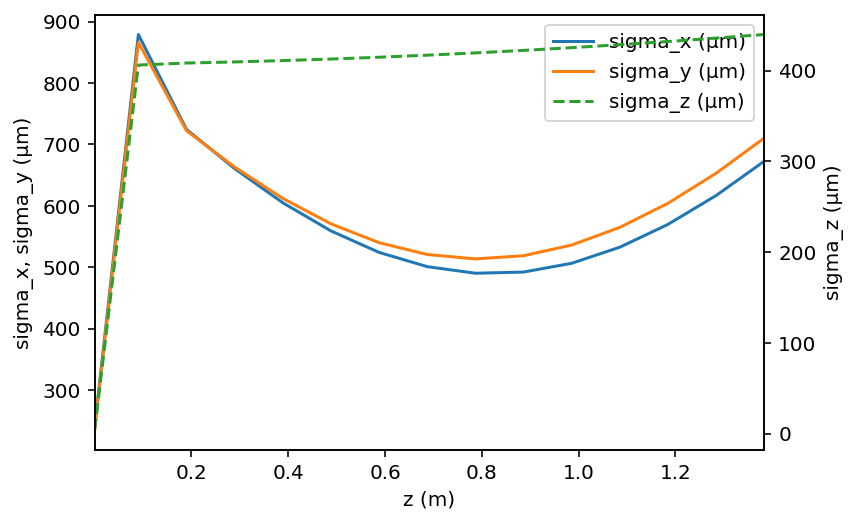

In [21]:
plotting.plot_stats_with_layout(twiss, ykeys=['sigma_x', 'sigma_y'], ykeys2=['sigma_z'], nice=True, include_layout=False)

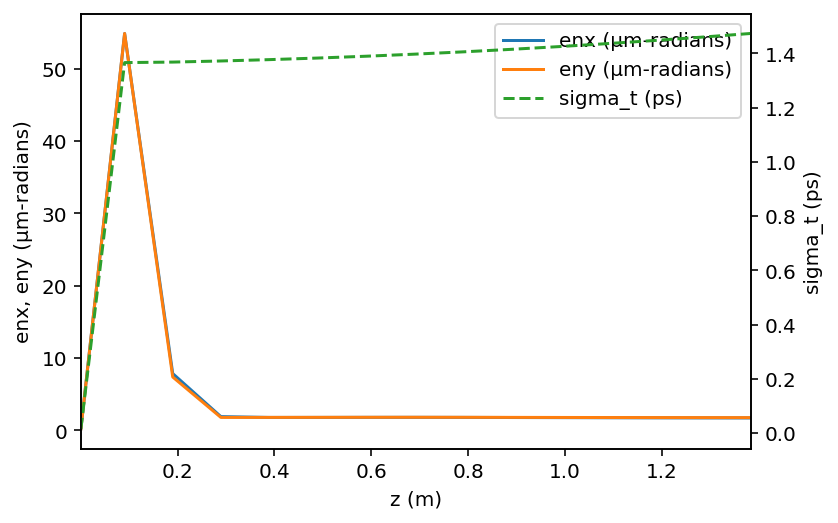

In [22]:
plotting.plot_stats_with_layout(twiss, ykeys=['enx', 'eny'], ykeys2=['sigma_t'], nice=True, include_layout=False)

# Using Elegant

In [23]:
twiss.read_elegant_twiss_files('example_elegant/S02.twi')

In [24]:
twiss.ecnx[-1]

1.95296119435908e-06

In [25]:
twiss.z

twissData([3.37147 , 3.37147 , 3.37147 , 3.448077, 3.476797, 3.577497,
           3.622777, 3.876797, 3.977497, 4.089827, 4.089827, 4.238067,
           4.268067, 4.343617, 4.693617, 4.693617, 4.815557, 4.845557,
           5.010827, 5.010827, 5.176797, 5.277497, 5.576797, 5.677497,
           6.389947, 6.490647, 6.541997, 6.583427, 6.583427, 6.660097,
           6.717497, 6.748497, 6.748497, 6.748497])

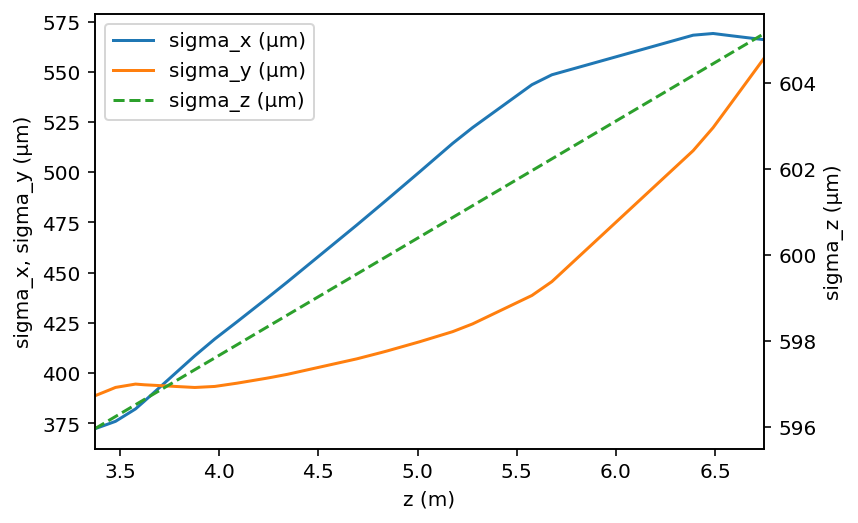

In [26]:
plotting.plot_stats_with_layout(twiss, nice=True)

# Combining

In [72]:
import SimulationFramework.Framework as fw
import SimulationFramework.Modules.read_twiss_file as rtf
import SimulationFramework.Modules.plotting as plotting
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower%matplotlib inline
twiss=rtf.twiss()

In [73]:
lattice = fw.Framework('.', clean=False, verbose=False)
lattice.loadSettings('Lattices/CLA10-BA1_OM.def')

In [74]:
twiss.read_twiss_files('example_optimisation')

Directory: example_optimisation
elegant ['CLA-C2V.twi', 'CLA-S02.twi', 'EBT-BA1.twi', 'EBT-INJ.twi', 'Linac.twi']
GPT []
ASTRA ['Gun.Xemit.001']


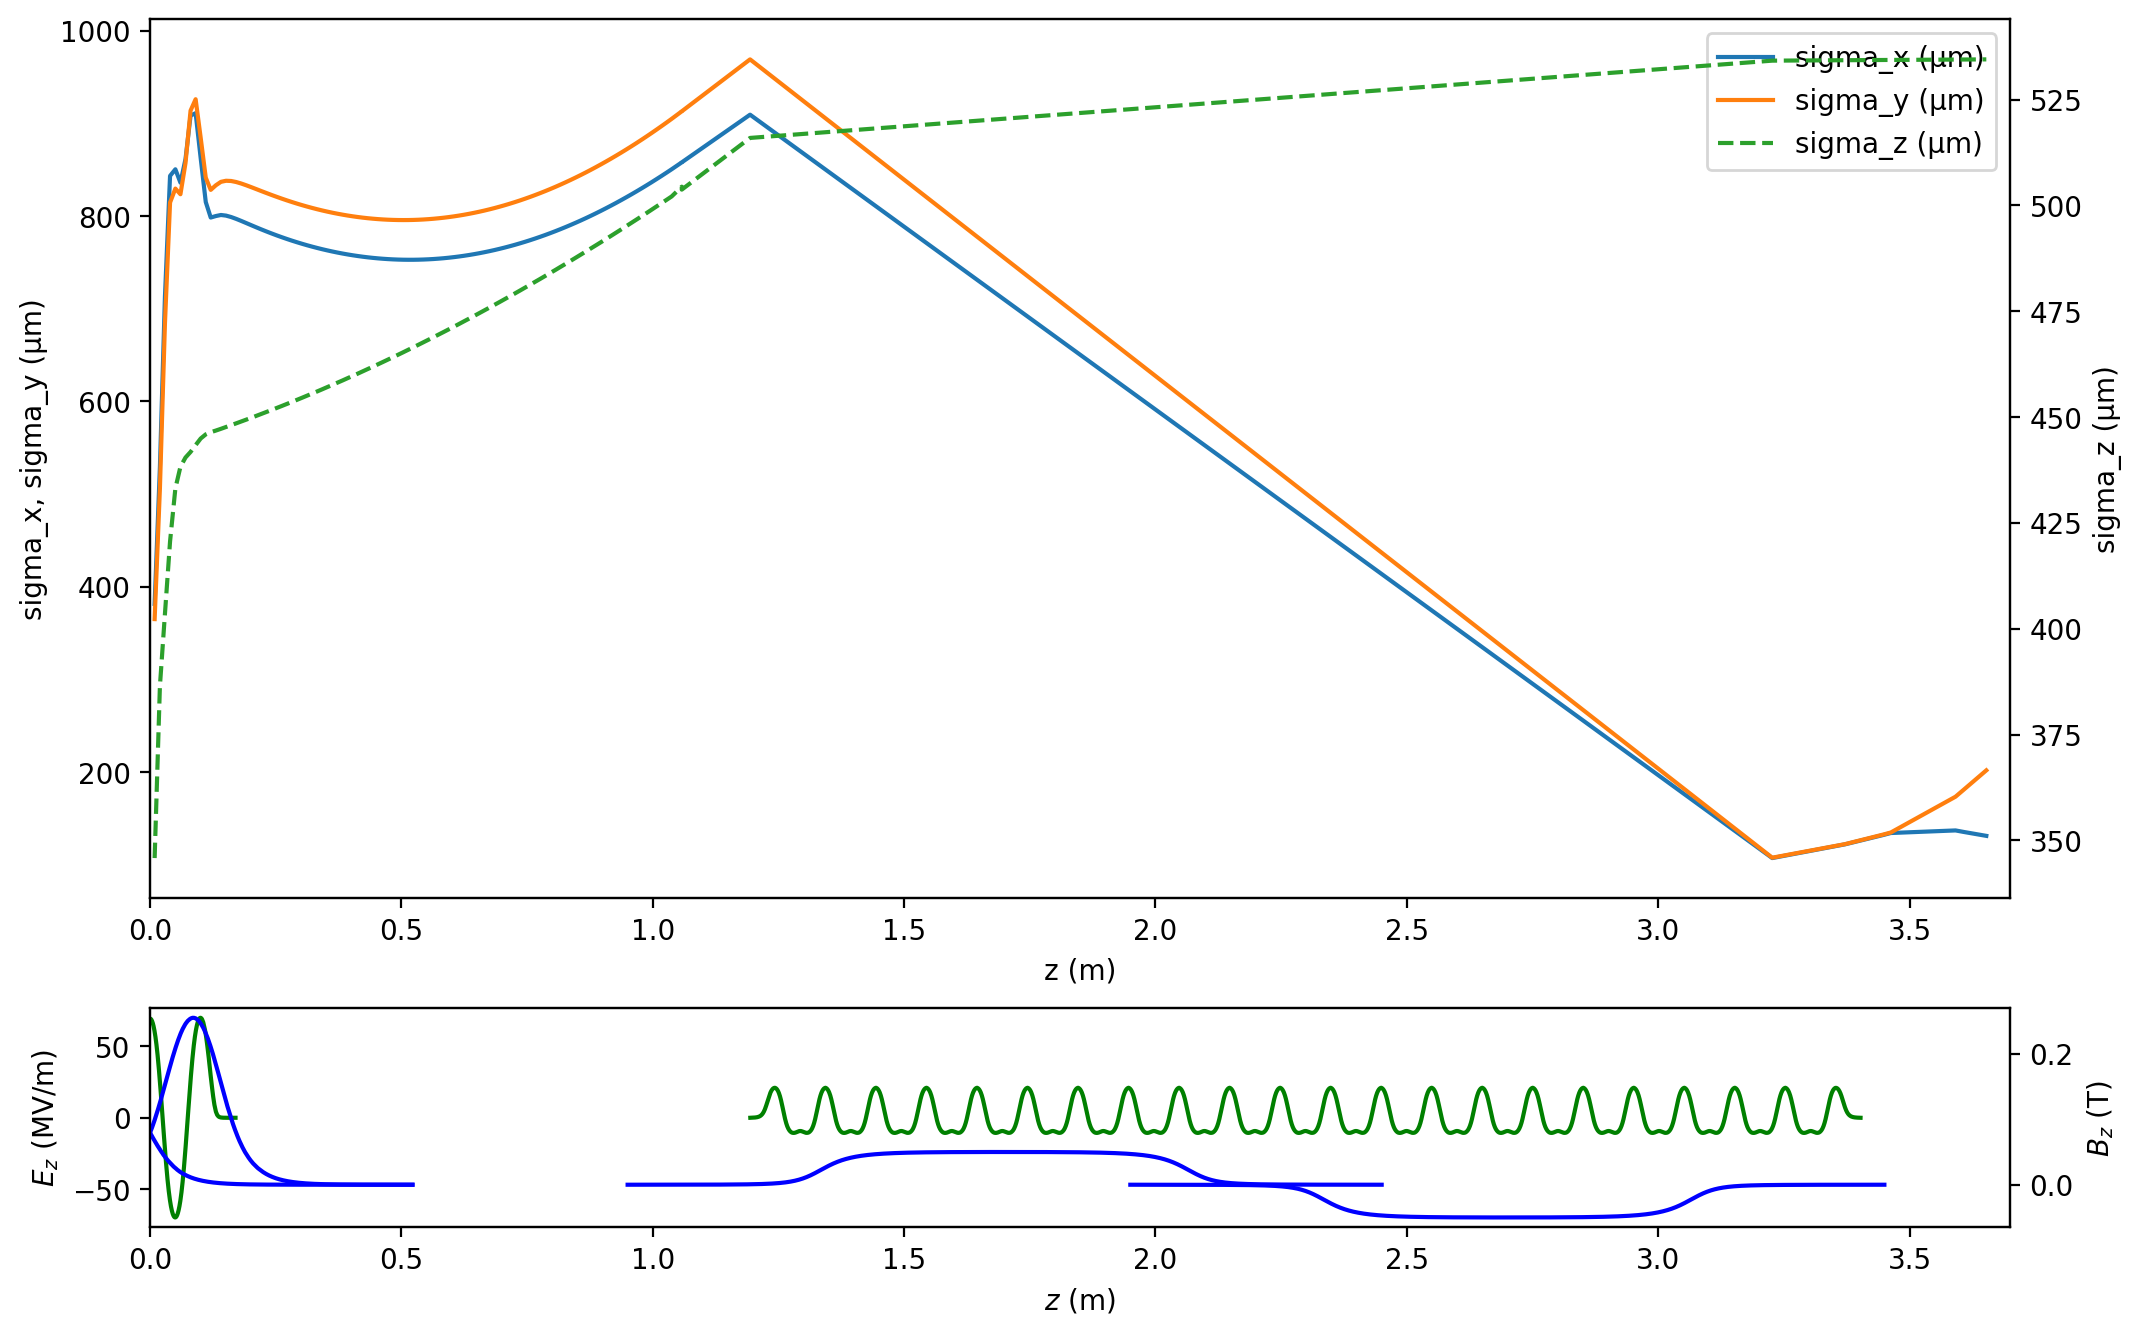

In [75]:
plotting.plot_stats_with_layout(twiss, nice=True, xkey='z', ykeys=['sigma_x', 'sigma_y'], include_layout=lattice,xlim=[0,3.7])